In [1]:
# Packages imports
import pandas as pd
import numpy as np
import datetime as dt
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import image as mpimg

In [2]:
# Import the dataset named "airbnb_price.csv" as a DataFrame called prices

Airbnb_Analysis = pd.read_csv('Airbnb_Analysis.csv')

# Display top few rows, the dataframe names as "prices"

Airbnb_Analysis.head()

,listing_id,price,borough,neighbourhood,price_per_month,latitude,longitude,room_type,description,host_name,review_date,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability,booked_days
0,2595,225.0,Manhattan,Midtown,6843.750000,40.75362,-73.98377,entire home/apt,Skylit Midtown Castle,Jennifer,2019-05-21 00:00:00,1,45,0.38,2,355,10
1,3831,89.0,Brooklyn,Clinton Hill,2707.083333,40.68514,-73.95976,entire home/apt,Cozy Entire Floor of Brownstone,LisaRoxanne,2019-07-05 00:00:00,1,270,4.64,1,194,171
2,5099,200.0,Manhattan,Murray Hill,6083.333333,40.74767,-73.97500,entire home/apt,Large Cozy 1 BR Apartment In Midtown East,Chris,2019-06-22 00:00:00,3,74,0.59,1,129,236
3,5178,79.0,Manhattan,Hell's Kitchen,2402.916667,40.76489,-73.98493,private room,Large Furnished Room Near B'way,Shunichi,2019-06-24 00:00:00,2,430,3.47,1,220,145
4,5238,150.0,Manhattan,Chinatown,4562.500000,40.71344,-73.99037,entire home/apt,Cute & Cozy Lower East Side 1 bdrm,Ben,2019-06-09 00:00:00,1,160,1.33,4,188,177


In [3]:
Airbnb_Analysis.shape

(25209, 17)

In [4]:
Airbnb_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      25209 non-null  int64  
 1   price                           25202 non-null  float64
 2   borough                         25202 non-null  object 
 3   neighbourhood                   25202 non-null  object 
 4   price_per_month                 25202 non-null  float64
 5   latitude                        25202 non-null  float64
 6   longitude                       25202 non-null  float64
 7   room_type                       25209 non-null  object 
 8   description                     25199 non-null  object 
 9   host_name                       25201 non-null  object 
 10  review_date                     25209 non-null  object 
 11  minimum_nights                  25209 non-null  int64  
 12  number_of_reviews               

In [5]:
Airbnb_Analysis.isna().sum()

listing_id                         0
price                              7
borough                            7
neighbourhood                      7
price_per_month                    7
latitude                           7
longitude                          7
room_type                          0
description                       10
host_name                          8
review_date                        0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability                       0
booked_days                        0
dtype: int64

In [6]:
## Number of unique listings:
print(f'There are {Airbnb_Analysis.listing_id.nunique()} unique listings in the neighbourhood')

There are 25209 unique listings in the neighbourhood


1.What is the most common room type in NYC Airbnb listings?

In [7]:
Airbnb_Analysis["room_type"].value_counts()


entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64

2.What is the average price of a listing by room type?


In [8]:
Airbnb_Analysis.groupby("room_type")["price"].mean().round(2)


room_type
entire home/apt    197.17
private room        81.67
shared room         53.65
Name: price, dtype: float64

3.Which borough has the highest average price per month?

In [9]:
Airbnb_Analysis.groupby("borough")["price_per_month"].mean().sort_values(ascending=False).round(2)


borough
Manhattan        5596.69
Brooklyn         3710.06
Queens           2823.09
Staten Island    2617.20
Bronx            2410.25
Name: price_per_month, dtype: float64

4.How many listings of each room type are in each borough?

In [10]:
Airbnb_Analysis.groupby("borough")["room_type"].value_counts()

borough        room_type      
Bronx          private room        403
               entire home/apt     261
               shared room          33
Brooklyn       entire home/apt    5367
               private room       4906
               shared room         187
Manhattan      entire home/apt    6170
               private room       3901
               shared room         251
Queens         private room       2009
               entire home/apt    1335
               shared room         112
Staten Island  entire home/apt     133
               private room        132
               shared room           2
Name: room_type, dtype: int64

5.How many listings in each room type category have a price greater than $500 per night?

In [11]:
listings_above_500 = Airbnb_Analysis[Airbnb_Analysis["price"] > 500].groupby("room_type").size()
listings_above_500

room_type
entire home/apt    395
private room        19
shared room          1
dtype: int64

6.What is the distribution of listing prices by borough?

In [12]:
distribution_of_listing_prices = Airbnb_Analysis.groupby('borough')['price'].agg(['min', 'max', 'mean'])
distribution_of_listing_prices.reset_index()

,borough,min,max,mean
0,Bronx,20.0,670.0,79.241033
1,Brooklyn,10.0,7500.0,121.974665
2,Manhattan,10.0,5100.0,184.000678
3,Queens,10.0,2600.0,92.813947
4,Staten Island,13.0,300.0,86.044944


7. What is the estimated amount of revenue generated by hosts in each borough?

In [13]:
revenue_generated = Airbnb_Analysis.groupby('borough').apply(lambda x: (x['price'] * x['booked_days']).sum()).reset_index(name='estimated_total_amount')
revenue_generated 

,borough,estimated_total_amount
0,Bronx,9324180.0
1,Brooklyn,279130240.0
2,Manhattan,393420567.0
3,Queens,58404083.0
4,Staten Island,3443919.0


8.What is the average price per month for listings in each neighborhood?

In [14]:
average_price_per_month = Airbnb_Analysis.groupby(['neighbourhood', 'room_type'])['price_per_month'].mean().reset_index()
average_price_per_month_sorted = average_price_per_month.sort_values(by='price_per_month', ascending=False)
average_price_per_month_sorted.round(2)

,neighbourhood,room_type,price_per_month
387,Sea Gate,entire home/apt,24485.42
438,Tribeca,entire home/apt,13707.58
24,Bayside,entire home/apt,12133.48
172,Flatiron District,entire home/apt,11766.18
394,SoHo,entire home/apt,11674.97
...,...,...,...
176,Flatlands,shared room,669.17
454,Van Nest,shared room,608.33
386,Schuylerville,shared room,608.33
203,Graniteville,private room,608.33


9.How many listings have no reviews?

In [15]:
listings_with_no_reviews = Airbnb_Analysis[Airbnb_Analysis["number_of_reviews"] == 0]
num_listings_with_no_reviews = listings_with_no_reviews.shape[0]
num_listings_with_no_reviews

0

10. How do the estimated book days correlate with the price of an Airbnb listing in New York City?

In [16]:
correlation = Airbnb_Analysis[["booked_days","price"]].corr()
correlation

,booked_days,price
booked_days,1.000000,-0.079639
price,-0.079639,1.000000


11. What is the average price per room type for listings 
that have at least 100 reviews and are available more than 200 days a year?

In [17]:
available_room_types=Airbnb_Analysis[(Airbnb_Analysis["number_of_reviews"] >= 100) & (Airbnb_Analysis["availability"] > 200)].groupby("room_type")["price"].mean()


In [18]:
available_room_types.round(2)

room_type
entire home/apt    179.54
private room        85.41
shared room         59.19
Name: price, dtype: float64

12. How many hosts have more than one listing, and what's the maximum number of listings by a single host name?

In [19]:
hosts_multiple_listings = Airbnb_Analysis.groupby('host_name').size().reset_index(name='listing_id')
num_hosts_multiple_listings = len(hosts_multiple_listings[hosts_multiple_listings['listing_id'] > 1])

num_hosts_multiple_listings

2929

In [20]:
max_listings_by_single_host = hosts_multiple_listings['listing_id'].max()
max_listings_by_single_host

215

13. Determine the top 5 hosts who have the highest price_per_month for their listings, 
considering only hosts who have at least 10 listings.

In [21]:
host_of_more_than_10_listings = Airbnb_Analysis[Airbnb_Analysis["calculated_host_listings_count"] >= 10].groupby('host_name')["price_per_month"].mean()
top_five_hosts = host_of_more_than_10_listings.sort_values(ascending=False).head(5).round(2)

top_five_hosts

host_name
Sally         109895.42
Red Awning     21452.58
Park Lane      12318.75
Janet          11334.01
Yotel           8749.86
Name: price_per_month, dtype: float64

14. Find the neighborhood(s) that have the highest variance in listing prices

In [22]:
neighborhood_variances = Airbnb_Analysis.groupby('neighbourhood')['price'].var().reset_index()
neighborhood_variances = neighborhood_variances.sort_values(by='price', ascending=False)
neighborhood_variances = neighborhood_variances.dropna().round(2)
neighborhood_variances

,neighbourhood,price
171,Sea Gate,924800.00
10,Bayside,230283.44
59,East Flatbush,173518.92
175,SoHo,122866.07
194,Tribeca,98547.14
...,...,...
196,Unionport,150.00
68,Eltingville,98.00
100,Hunts Point,94.02
153,Port Richmond,32.70


15. Calculate the average price_per_month for each neighborhood, taking into account only listings 
where the host has a minimum_nights value that is higher than the average minimum_nights value across all listings.

In [23]:
average_min_nights = Airbnb_Analysis['minimum_nights'].mean()

filtered_listings = Airbnb_Analysis[Airbnb_Analysis['minimum_nights'] > average_min_nights]

neighborhood_avg_price = filtered_listings.groupby('neighbourhood')['price_per_month'].mean().reset_index()
neighborhood_avg_price.sort_values('price_per_month', ascending=False).round(2)

,neighbourhood,price_per_month
7,Bayside,11949.95
140,Tribeca,11791.53
56,Flatiron District,10172.69
127,SoHo,9549.23
104,NoHo,9374.04
...,...,...
148,West Brighton,1216.67
26,Clason Point,1216.67
3,Bath Beach,1003.75
66,Grant City,912.50


Exploratory Data Analysis
Correlation

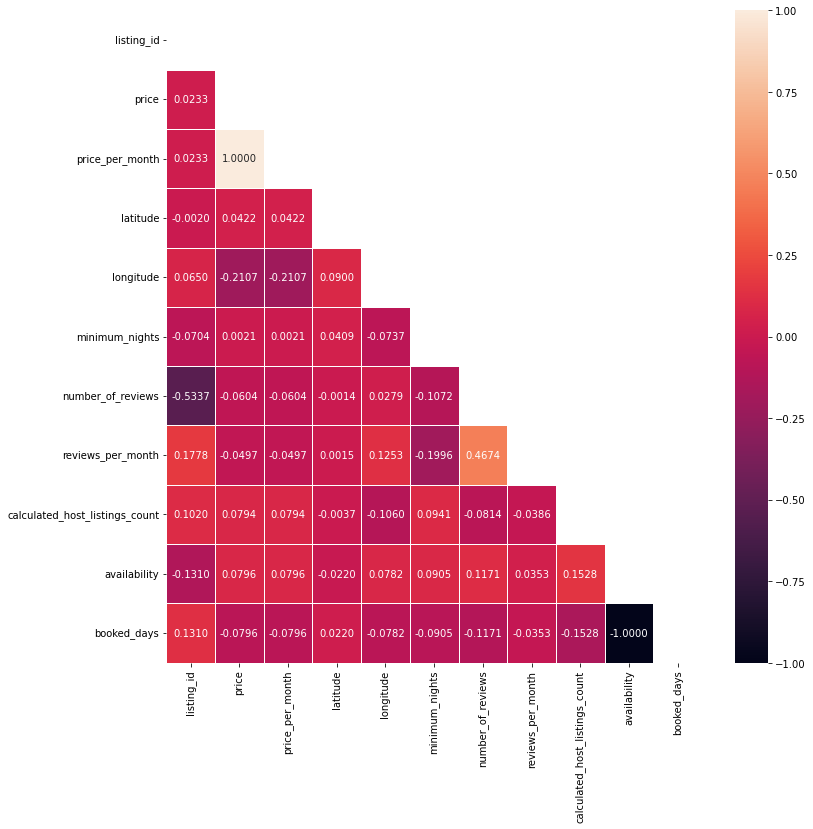

In [24]:
correlation_airbnb = Airbnb_Analysis.corr()
fig, ax = plt.subplots(figsize=(12, 12))
dropSelf = np.zeros_like(correlation_airbnb)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(correlation_airbnb, linewidths=.5, annot=True, fmt=".4f", mask=dropSelf)
plt.savefig("correlation_airbnb.png")
plt.show()


Relation between neighbourhood group and availability

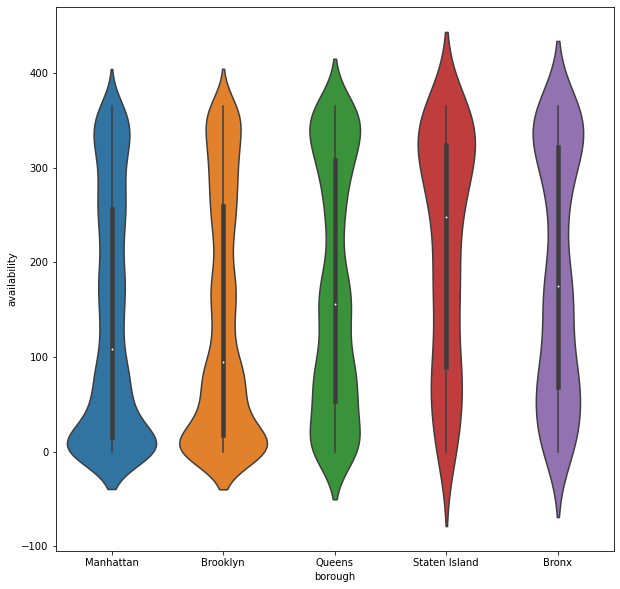

In [26]:
plt.figure(figsize=(10,10))
ax = sns.violinplot(data= Airbnb_Analysis, x="borough", y="availability")

Room_types and their relation with availability in different neighbourhood groups!

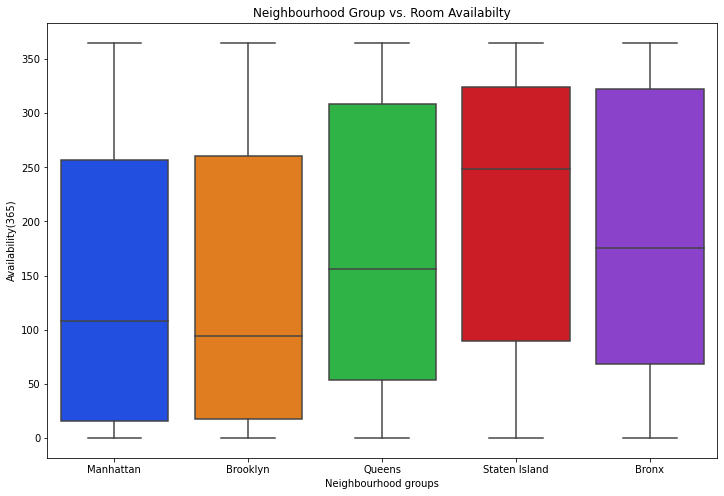

In [27]:
f,ax = plt.subplots(figsize=(12,8))
ax=sns.boxplot(x='borough',y='availability',data=Airbnb_Analysis,palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

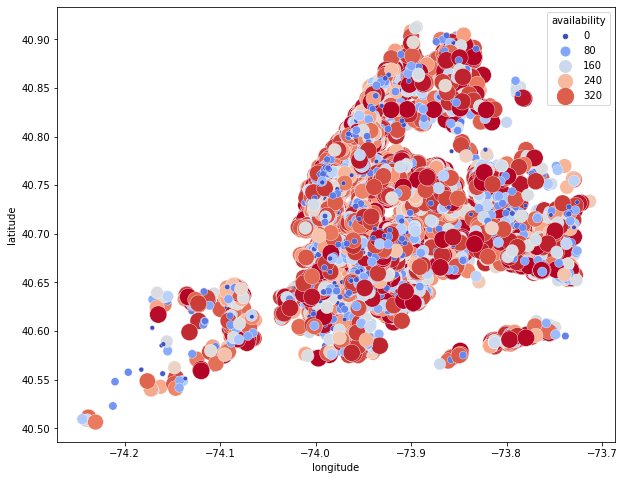

In [28]:
f, ax = plt.subplots(figsize=(10, 8))
ax=sns.scatterplot(data=Airbnb_Analysis,x='longitude', y='latitude', hue="availability",palette='coolwarm',size='availability',
    sizes=(20,300))

Relation between neighbourhood group and price

<AxesSubplot:xlabel='borough', ylabel='price'>

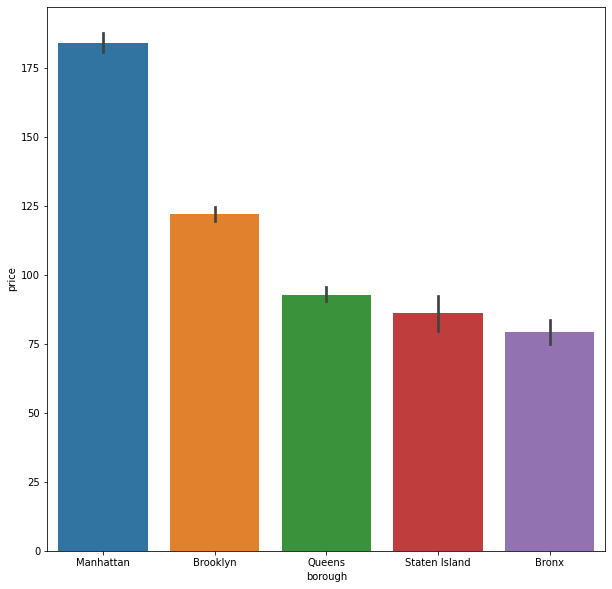

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(data=Airbnb_Analysis, x='borough', y='price')

Relation between Borough  and prices

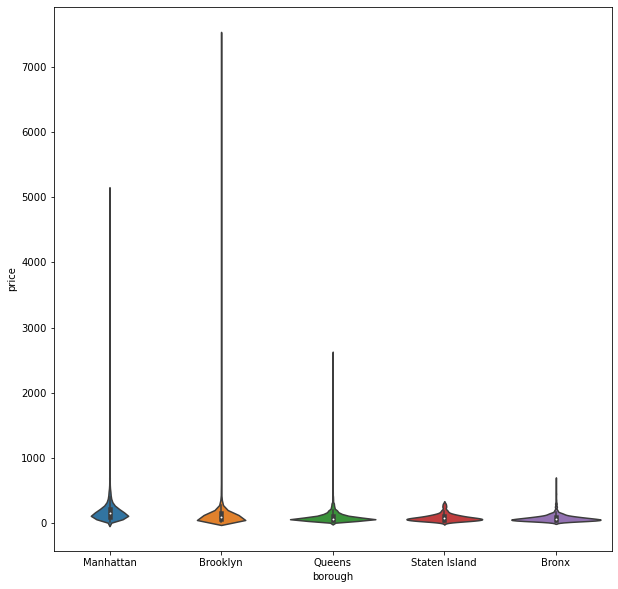

In [30]:
plt.figure(figsize=(10,10))
ax = sns.violinplot(data= Airbnb_Analysis, x="borough", y="price")

Since we have latitude and longitude of each listing, let's plot it using a scatterplot

Text(0.5, 1.0, 'Location Co-ordinates')

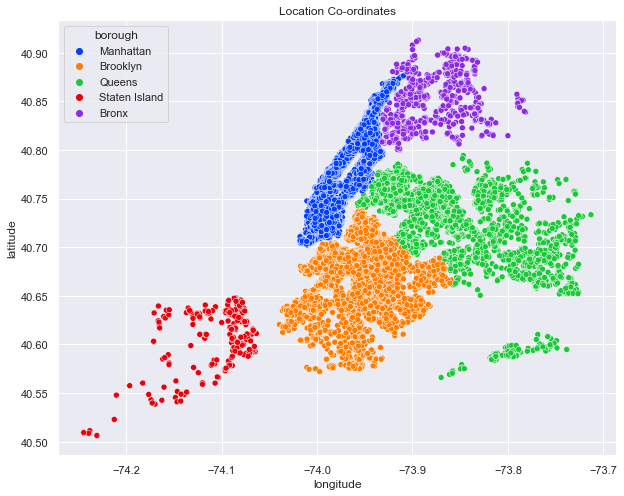

In [31]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=Airbnb_Analysis, x="longitude", y="latitude",hue='borough',palette='bright')
ax.set_title('Location Co-ordinates')

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

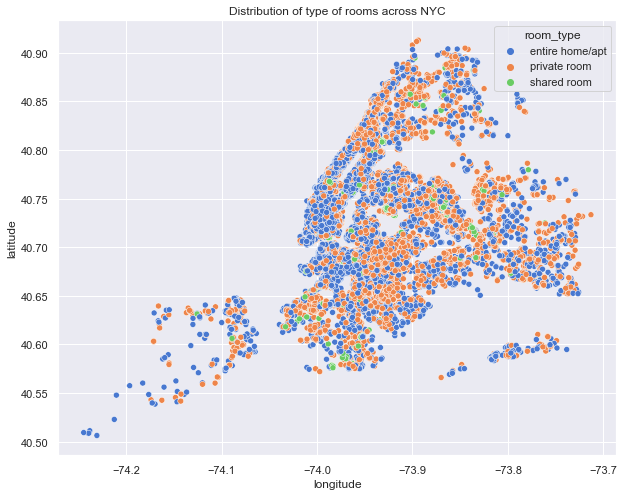

In [32]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=Airbnb_Analysis.longitude, y=Airbnb_Analysis.latitude,hue=Airbnb_Analysis.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

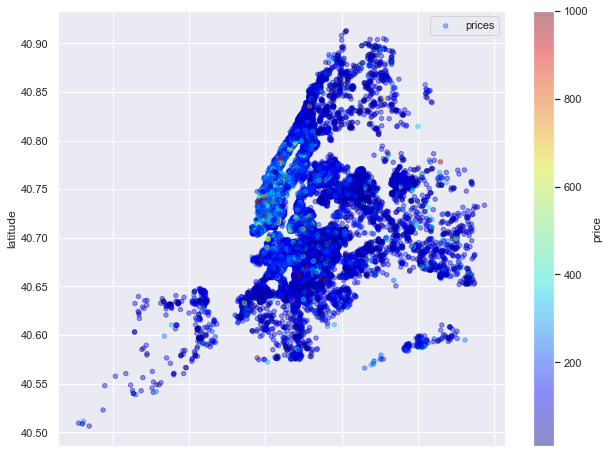

In [33]:
lat_long = Airbnb_Analysis.plot(kind='scatter', x='longitude', y='latitude', label='prices', c='price',
                               cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10, 8),
                               vmin=10,vmax=1000)
                                
lat_long.legend()


In [34]:
Airbnb_Analysis['price'].describe()

count    25202.000000
mean       141.817316
std        147.350650
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64

Now let's categorise rooms based on price Let price less than 75 dollars be low,
between 75 and 500 dollars be medium and
above 500 dollars be high

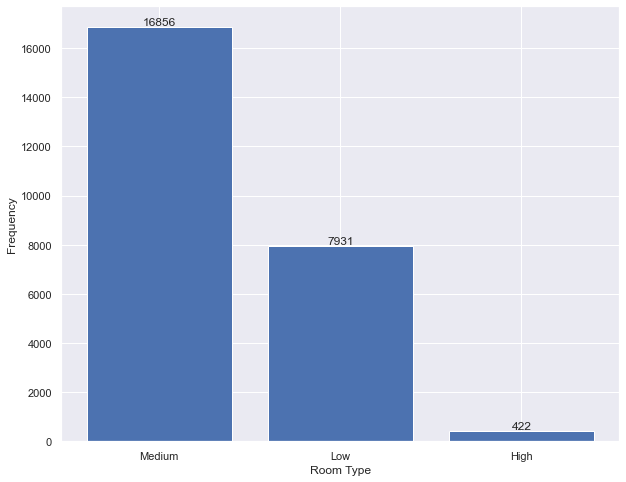

In [35]:
import matplotlib.pyplot as plt

def room_type(price):
    if price <= 75 :
        return 'Low'
    elif price > 75 and price <= 500:
        return 'Medium'
    else:
        return 'High'

room_type_counts = Airbnb_Analysis['price'].apply(room_type).value_counts()

plt.bar(room_type_counts.index, room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Frequency')

# Add frequency values on top of the bars
for i, value in enumerate(room_type_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()


Price Analysis
Distribution of price:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


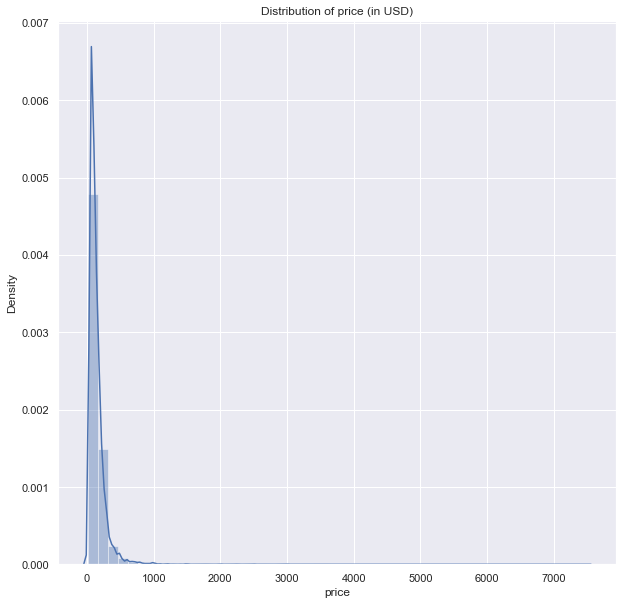

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.distplot(Airbnb_Analysis['price'], bins=50, kde=True)
plt.title("Distribution of price (in USD)")
plt.show()


In [37]:
Airbnb_Analysis['price'].describe()

count    25202.000000
mean       141.817316
std        147.350650
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64

Average property value for each neighbourhood group

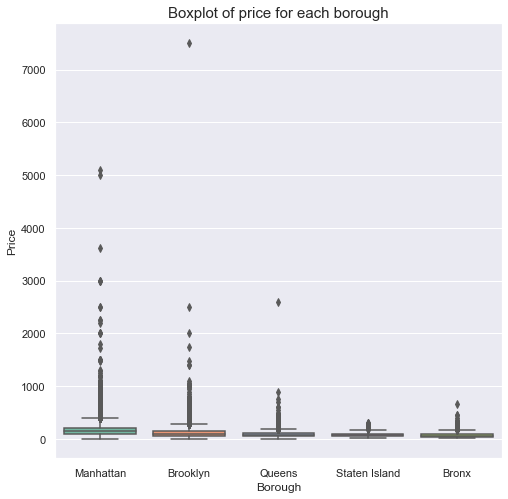

In [38]:
## Check the average property value for each neighbourhood group:
plt.figure(figsize=(8,8))
sns.boxplot(x=Airbnb_Analysis['borough'],y=Airbnb_Analysis['price'],palette=sns.color_palette('Set2'))
plt.title("Boxplot of price for each borough",fontsize=15)
plt.xlabel("Borough",fontsize=12)
plt.ylabel("Price",fontsize=12)
plt.show()

In [39]:
Airbnb_Analysis.groupby('borough')['price'].agg(['median','mean']).sort_values('median',ascending=False).reset_index().round(2)

,borough,median,mean
0,Manhattan,149.0,184.00
1,Brooklyn,95.0,121.97
2,Staten Island,71.0,86.04
3,Queens,70.0,92.81
4,Bronx,65.0,79.24


Minimum nights and price:

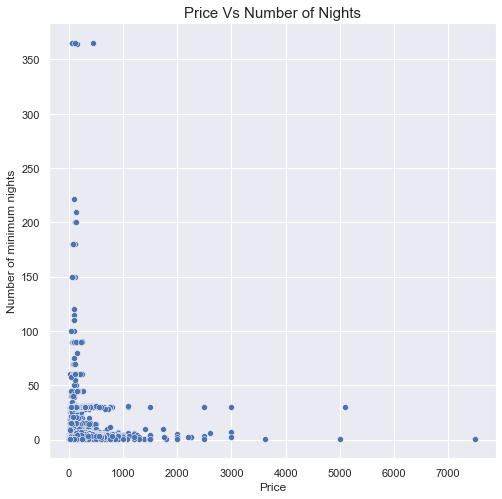

In [40]:
## Minimum nights and price:
plt.figure(figsize=(8,8))
sns.scatterplot(x='price',y='minimum_nights',data=Airbnb_Analysis[(Airbnb_Analysis.price>0) & (Airbnb_Analysis.minimum_nights>0)])
plt.title("Price Vs Number of Nights",fontsize=15)
plt.xlabel("Price",fontsize=12)
plt.ylabel("Number of minimum nights",fontsize=12)
plt.show()

In [41]:
Airbnb_Analysis.groupby('borough').agg({'price':'median','minimum_nights':'median'}).sort_values("price",ascending=False)

,price,minimum_nights
borough,,
Manhattan,149.0,2.0
Brooklyn,95.0,2.0
Staten Island,71.0,2.0
Queens,70.0,2.0
Bronx,65.0,2.0


Room Type and Price

In [42]:
## Room Type and Price:
Airbnb_Analysis.groupby('room_type')['price'].median()

room_type
entire home/apt    159.0
private room        70.0
shared room         41.0
Name: price, dtype: float64

Price and reviews

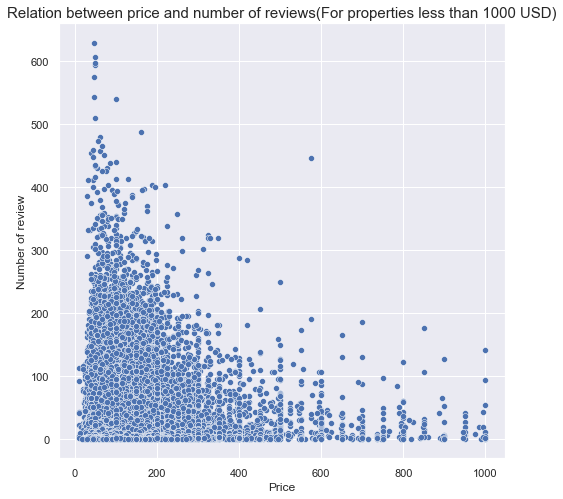

In [43]:
### Price and reviews:
plt.figure(figsize=(8,8))
sns.scatterplot(x='price',y='number_of_reviews',data=Airbnb_Analysis[Airbnb_Analysis.price<1000])
plt.title("Relation between price and number of reviews(For properties less than 1000 USD)",fontsize=15)
plt.xlabel("Price",fontsize=12)
plt.ylabel("Number of review",fontsize=12)
plt.show()

Host Analysis

In [44]:
print(f'There are {Airbnb_Analysis.host_name.nunique()} unique hosts in the dataset')

There are 7363 unique hosts in the dataset


Host listing count

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


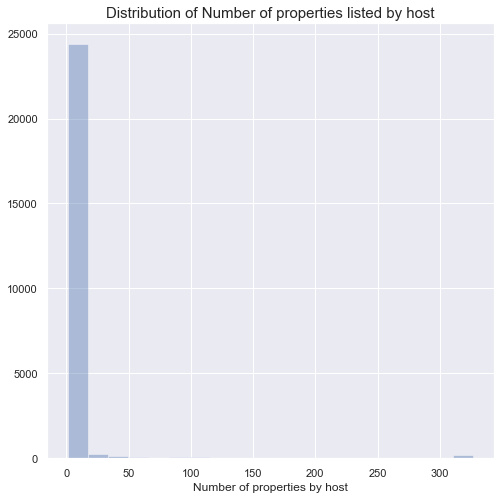

In [45]:
## Host listing count:
plt.figure(figsize=(8,8))
sns.distplot(Airbnb_Analysis.calculated_host_listings_count,bins=20,kde=False)
plt.title("Distribution of Number of properties listed by host",fontsize=15)
plt.xlabel("Number of properties by host",fontsize=12)
plt.show()

In [46]:
Airbnb_Analysis.calculated_host_listings_count.describe()

count    25209.000000
mean         6.147606
std         31.354740
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

Host and Room Type

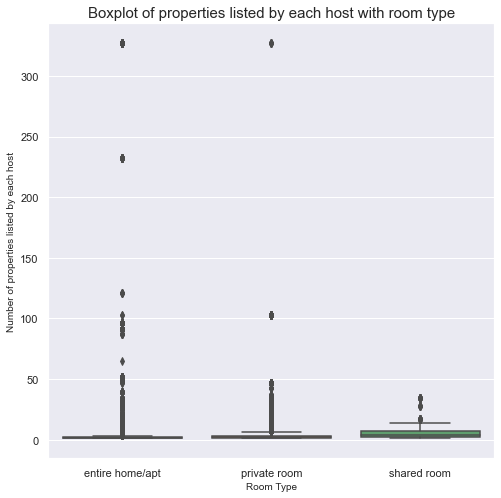

In [47]:
plt.figure(figsize=(8,8))
sns.boxplot(x='room_type',y='calculated_host_listings_count',data=Airbnb_Analysis)
plt.title("Boxplot of properties listed by each host with room type",fontsize=15)
plt.xlabel("Room Type",fontsize=10)
plt.ylabel("Number of properties listed by each host",fontsize=10)
plt.show()

Host with all three room type

In [48]:
variety=Airbnb_Analysis[Airbnb_Analysis.calculated_host_listings_count>1].groupby('host_name')['room_type'].nunique().reset_index().sort_values('room_type',ascending=False)
print(f'Number of hosts with all three room types listed in Airbnb {len(variety[variety.room_type==3].host_name)}')


Number of hosts with all three room types listed in Airbnb 76


In [49]:
variety_data=Airbnb_Analysis[Airbnb_Analysis.host_name.isin(variety[variety.room_type==3].host_name)]
                                                            
variety_data.groupby('host_name')['borough'].nunique().sort_values(ascending=False)
  

host_name
Alex             5
Michael          5
Maria            5
David            5
Jessica          4
                ..
Jammie           1
Cebile           1
Lucca & Paula    1
Joica            1
Vie              1
Name: borough, Length: 76, dtype: int64

In [50]:
borough_counts = variety_data.groupby('host_name')['borough'].nunique()
filtered_host_names = borough_counts[borough_counts >= 4].sort_values(ascending=False)
filtered_host_names

host_name
Alex         5
David        5
Maria        5
Michael      5
Sarah        4
Raquel       4
Nick         4
Tanya        4
Monica       4
Jorge        4
Melissa      4
Taylor       4
Luis         4
Lisa         4
Karen        4
Julie        4
Joseph       4
Jose         4
Jessica      4
Angela       4
Jean         4
Jay          4
James        4
George       4
Fernando     4
Eric         4
Elizabeth    4
Diana        4
Deborah      4
Chris        4
Charles      4
Carol        4
Brian        4
Ben          4
Victor       4
Name: borough, dtype: int64

Maximum Listing by host
From our earlier analysis , we understood that the maximum number of listing by a single host is 327.Lets check the details for this host.

In [51]:
max_host=Airbnb_Analysis[Airbnb_Analysis.calculated_host_listings_count==327]


In [52]:
print(f'Name of host:{list(max_host.host_name.unique())}')
print(f'boroughs listed:{list(max_host.borough.unique())}')
print(f'Neighbourhoods listed:{list(max_host.neighbourhood.unique())}')
print(f'Room type listed:{list(max_host.room_type.unique())}')
print(f'Maximum price listed:{max(max_host.price)} USD Located in neighbourhood {max_host[max_host.price==max(max_host.price)].neighbourhood.unique()}')
print(f'Minimum price listed:{min(max_host.price)} USD Located in neighbourhood {max_host[max_host.price==min(max_host.price)].neighbourhood.unique()}')

Name of host:['Sonder (NYC)']
boroughs listed:['Manhattan']
Neighbourhoods listed:['Financial District', 'Murray Hill', "Hell's Kitchen", 'Theater District', 'Upper East Side']
Room type listed:['entire home/apt', 'private room']
Maximum price listed:616.0 USD Located in neighbourhood ['Financial District']
Minimum price listed:100.0 USD Located in neighbourhood ['Financial District']


In [53]:
## Top 5 Host with maximum median price and median nights for those holding more than 1 property:
Airbnb_Analysis[Airbnb_Analysis.calculated_host_listings_count>10].groupby('host_name').agg({'price':'median','minimum_nights':'median'}).sort_values('price',ascending=False)[:5]

,price,minimum_nights
host_name,,
Sally,3613.0,1.0
Red Awning,699.0,3.0
Park Lane,425.0,1.0
Janet,387.0,1.0
Blueground,282.0,30.0


In [55]:
Airbnb_Analysis.groupby(['borough', 'room_type'])['price'].agg(['min', 'max', 'mean','median']).reset_index()



,borough,room_type,min,max,mean,median
0,Bronx,entire home/apt,35.0,670.0,120.517241,100.0
1,Bronx,private room,23.0,187.0,56.292804,50.0
2,Bronx,shared room,20.0,60.0,33.030303,28.0
3,Brooklyn,entire home/apt,10.0,2500.0,169.903671,145.0
4,Brooklyn,private room,10.0,7500.0,72.688545,65.0
5,Brooklyn,shared room,18.0,250.0,39.422460,35.0
6,Manhattan,entire home/apt,16.0,5100.0,238.024473,195.0
7,Manhattan,private room,10.0,1500.0,105.698795,90.0
8,Manhattan,shared room,25.0,800.0,72.960159,65.0
9,Queens,entire home/apt,10.0,2600.0,140.931086,120.0
